In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

0    1857
1    2274
2    3285
3    2635
4    1469
Name: text, dtype: int64


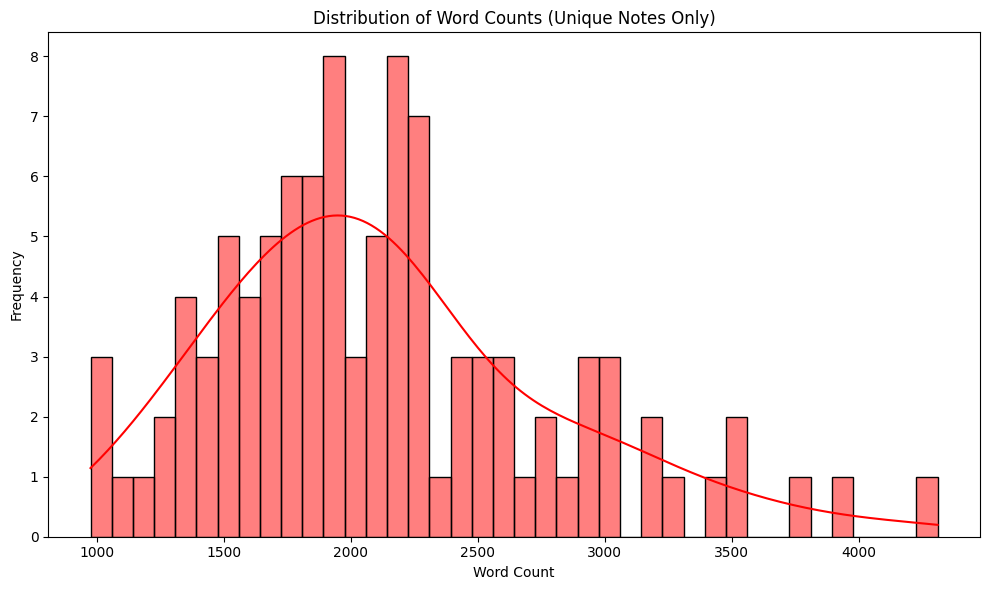

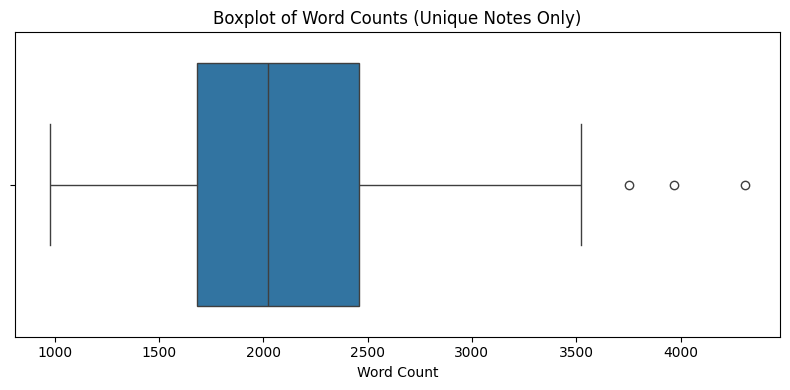

In [4]:
df = pd.read_csv("annotated_apixaban_combined_fixed.csv")

# Standardize fields a bit
df["question_type"] = df["question_type"].str.lower().str.strip()
df["question"] = df["question"].astype(str).str.strip()

# Normalize boolean answers to "yes"/"no"
df["answer_str"] = (
    df["answer"]
      .astype(str)
      .str.strip()
      .str.lower()
      .replace({"y": "yes", "n": "no", "true": "yes", "false": "no"})
)

# ---------------------------------------------------------------------
# Word Count on All Notes
# ---------------------------------------------------------------------

# ---------------------------------------------------------------------
# Word Count on UNIQUE Notes
# ---------------------------------------------------------------------

# Ensure text is string type
df["text"] = df["text"].astype(str)

# Take only unique note texts
unique_texts = df["text"].drop_duplicates().reset_index(drop=True)

# Compute word count
word_counts = unique_texts.str.split().str.len()

# Quick check
print(word_counts.head())

# Plot distribution of word counts for unique notes
plt.figure(figsize=(10, 6))
sns.histplot(word_counts, bins=40, kde=True, color = 'red')
plt.title("Distribution of Word Counts (Unique Notes Only)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("unique_wordcount_distribution.png", bbox_inches="tight")
plt.show()

# Optional: boxplot to view outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=word_counts)
plt.title("Boxplot of Word Counts (Unique Notes Only)")
plt.xlabel("Word Count")
plt.tight_layout()
plt.savefig("unique_wordcount_boxplot.png", bbox_inches="tight")
plt.show()

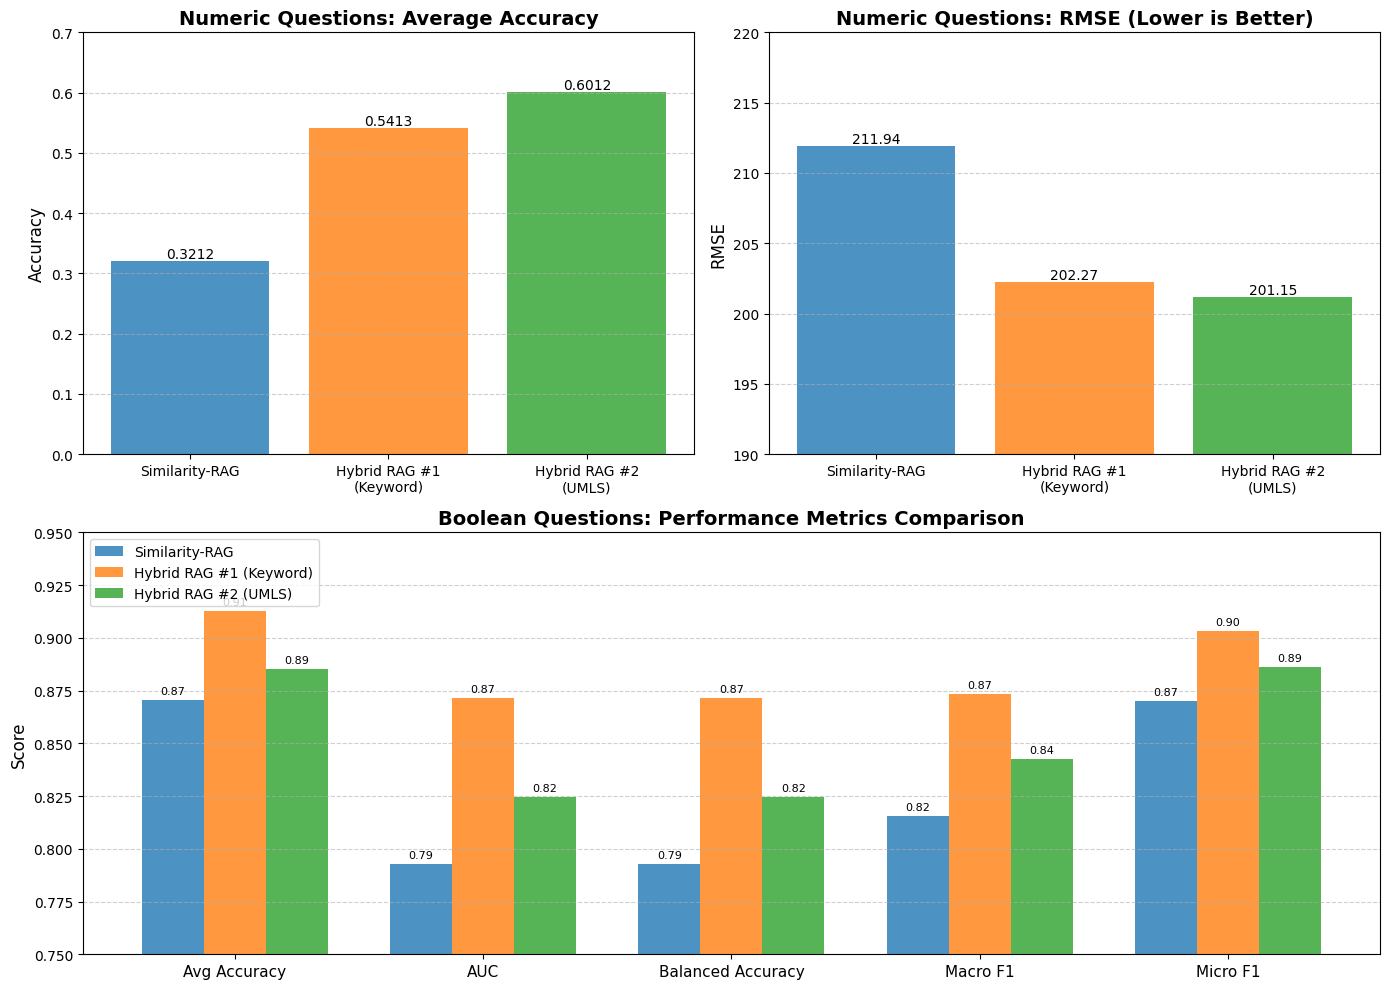

In [5]:
# Set up the figure and axes
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])  # Top Left: Numeric Accuracy
ax2 = fig.add_subplot(gs[0, 1])  # Top Right: Numeric RMSE
ax3 = fig.add_subplot(gs[1, :])  # Bottom: Boolean Metrics

# Common Data
methods = ['Similarity-RAG', 'Hybrid RAG #1\n(Keyword)', 'Hybrid RAG #2\n(UMLS)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Blue, Orange, Green

# --- Plot 1: Numeric Questions - Avg Accuracy ---
numeric_acc = [0.3212, 0.5413, 0.6012]
bars1 = ax1.bar(methods, numeric_acc, color=colors, alpha=0.8)
ax1.set_title('Numeric Questions: Average Accuracy', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_ylim(0, 0.7)
ax1.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# --- Plot 2: Numeric Questions - RMSE ---
numeric_rmse = [211.9370, 202.2705, 201.1485]
bars2 = ax2.bar(methods, numeric_rmse, color=colors, alpha=0.8)
ax2.set_title('Numeric Questions: RMSE (Lower is Better)', fontsize=14, fontweight='bold')
ax2.set_ylabel('RMSE', fontsize=12)
ax2.set_ylim(190, 220) # Zoom in to show difference
ax2.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# --- Plot 3: Boolean Questions - Grouped Metrics ---
metrics = ['Avg Accuracy', 'AUC', 'Balanced Accuracy', 'Macro F1', 'Micro F1']
x = np.arange(len(metrics))
width = 0.25

# Data for Boolean
bool_sim = [0.8707, 0.7927, 0.7927, 0.8155, 0.87]
bool_hyb1 = [0.9127, 0.8716, 0.8716, 0.8732, 0.9033]
bool_hyb2 = [0.8853, 0.8246, 0.8246, 0.8424, 0.886]

rects1 = ax3.bar(x - width, bool_sim, width, label='Similarity-RAG', color=colors[0], alpha=0.8)
rects2 = ax3.bar(x, bool_hyb1, width, label='Hybrid RAG #1 (Keyword)', color=colors[1], alpha=0.8)
rects3 = ax3.bar(x + width, bool_hyb2, width, label='Hybrid RAG #2 (UMLS)', color=colors[2], alpha=0.8)

ax3.set_title('Boolean Questions: Performance Metrics Comparison', fontsize=14, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics, fontsize=11)
ax3.set_ylabel('Score', fontsize=12)
ax3.set_ylim(0.75, 0.95) # Zoom in to show details
ax3.legend(loc='upper left', fontsize=10)
ax3.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels for the grouped chart (optional, can be crowded)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax3.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8, rotation=0)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

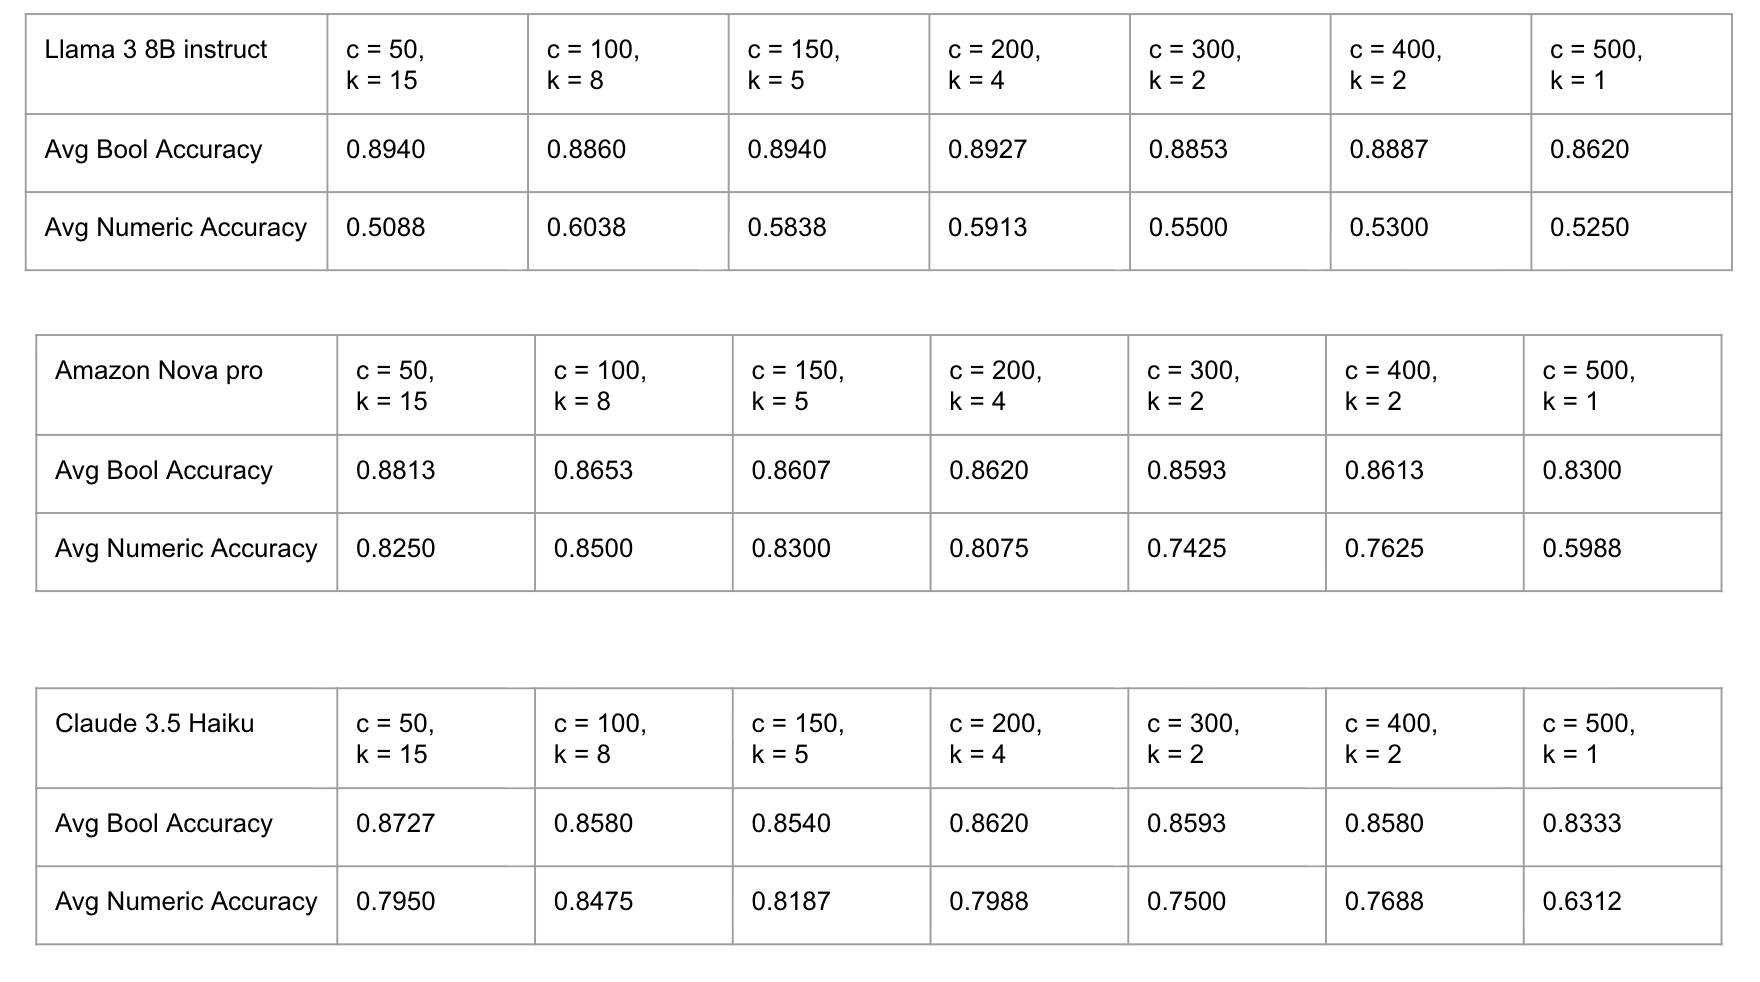